In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import time
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_dev = x_train[-10000:]
y_dev = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

# one-hot format
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
y_dev = np_utils.to_categorical(y_dev, 10)

x_train = x_train / 255.0
x_dev = x_dev / 255.0
x_test = x_test / 255.0

Epoch 1/50
391/391 [==============================] - 2s 5ms/step - loss: 0.3304 - accuracy: 0.9289 - val_loss: 0.1902 - val_accuracy: 0.9693
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 0.1745 - accuracy: 0.9717 - val_loss: 0.1643 - val_accuracy: 0.9734
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 0.1381 - accuracy: 0.9808 - val_loss: 0.1516 - val_accuracy: 0.9757
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 0.1181 - accuracy: 0.9841 - val_loss: 0.1558 - val_accuracy: 0.9733
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 0.1052 - accuracy: 0.9872 - val_loss: 0.1605 - val_accuracy: 0.9710
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 0.0950 - accuracy: 0.9886 - val_loss: 0.1371 - val_accuracy: 0.9765
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 0.0886 - accuracy: 0.9902 - val_loss: 0.1256 - val_accuracy: 0.9793
Epoch 

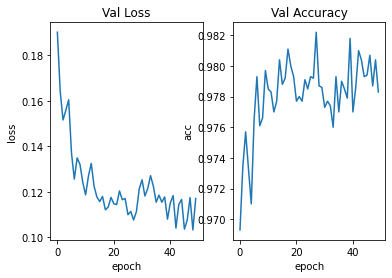

313/313 [==============================] - 0s 978us/step - loss: 0.1078 - accuracy: 0.9803
test loss: 0.10781887173652649
test accuracy: 0.9803000092506409


In [2]:
# 1
# L2 regularization, Adam optimizer

batchSize = 128
epoch = 50

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time:', time.time() - start)

print('train loss:', model_fit.history['loss'][-1])
print('train accuracy:', model_fit.history['accuracy'][-1])

print('dev loss:', model_fit.history['val_loss'][-1])
print('dev accuracy:', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/50
391/391 [==============================] - 2s 5ms/step - loss: 0.2727 - accuracy: 0.9174 - val_loss: 0.1142 - val_accuracy: 0.9659
Epoch 2/50
391/391 [==============================] - 2s 4ms/step - loss: 0.1091 - accuracy: 0.9667 - val_loss: 0.1123 - val_accuracy: 0.9660
Epoch 3/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0762 - accuracy: 0.9752 - val_loss: 0.0865 - val_accuracy: 0.9758
Epoch 4/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0593 - accuracy: 0.9811 - val_loss: 0.0834 - val_accuracy: 0.9770
Epoch 5/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0473 - accuracy: 0.9843 - val_loss: 0.0796 - val_accuracy: 0.9793
Epoch 6/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0375 - accuracy: 0.9876 - val_loss: 0.0837 - val_accuracy: 0.9783
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 0.0346 - accuracy: 0.9890 - val_loss: 0.0763 - val_accuracy: 0.9800
Epoch 

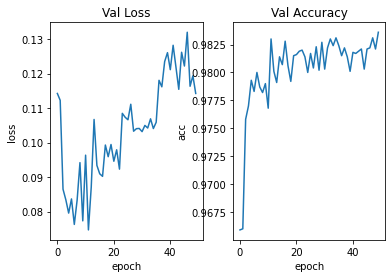

313/313 [==============================] - 0s 678us/step - loss: 0.1027 - accuracy: 0.9843
test loss: 0.10272851586341858
test accuracy: 0.9843000173568726


In [3]:
# 2
# Dropout regularization(0.2), Adam optimizer

batchSize = 128
epoch = 50

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/50
390/391 [============================>.] - ETA: 0s - loss: 0.2425 - accuracy: 0.9290
Epoch 1: val_loss improved from inf to 0.12882, saving model to best_model.h5
391/391 [==============================] - 2s 4ms/step - loss: 0.2423 - accuracy: 0.9291 - val_loss: 0.1288 - val_accuracy: 0.9608
Epoch 2/50
388/391 [============================>.] - ETA: 0s - loss: 0.0883 - accuracy: 0.9719
Epoch 2: val_loss improved from 0.12882 to 0.08309, saving model to best_model.h5
391/391 [==============================] - 2s 4ms/step - loss: 0.0881 - accuracy: 0.9719 - val_loss: 0.0831 - val_accuracy: 0.9749
Epoch 3/50
384/391 [============================>.] - ETA: 0s - loss: 0.0538 - accuracy: 0.9832
Epoch 3: val_loss did not improve from 0.08309
391/391 [==============================] - 2s 4ms/step - loss: 0.0540 - accuracy: 0.9831 - val_loss: 0.0954 - val_accuracy: 0.9724
Epoch 4/50
391/391 [==============================] - ETA: 0s - loss: 0.0357 - accuracy: 0.9887
Epoch 4: val_los

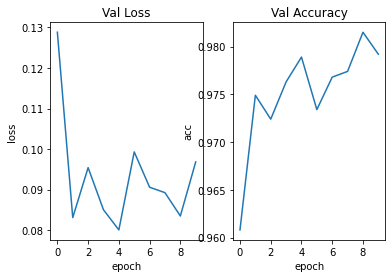

313/313 [==============================] - 0s 644us/step - loss: 0.0676 - accuracy: 0.9802
best test model loss:  0.06756872683763504
best test model accuracy:  0.9801999926567078


In [4]:
# 3
# Early stopping(patience=5), adam optimizer

batchSize = 128
epoch = 50

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
# early stopping
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev), callbacks=[early_stopping, model_checkpoint])

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

best_model = keras.models.load_model('best_model.h5')
best_test_loss, best_test_acc = best_model.evaluate(x_test, y_test)
print('best test model loss: ', best_test_loss)
print('best test model accuracy: ', best_test_acc)

Epoch 1/50
391/391 [==============================] - 3s 6ms/step - loss: 0.2856 - accuracy: 0.9436 - val_loss: 0.2055 - val_accuracy: 0.9693
Epoch 2/50
391/391 [==============================] - 2s 6ms/step - loss: 0.1655 - accuracy: 0.9769 - val_loss: 0.1910 - val_accuracy: 0.9702
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 0.1415 - accuracy: 0.9823 - val_loss: 0.1862 - val_accuracy: 0.9706
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 0.1268 - accuracy: 0.9853 - val_loss: 0.1835 - val_accuracy: 0.9703
Epoch 5/50
391/391 [==============================] - 2s 6ms/step - loss: 0.1155 - accuracy: 0.9876 - val_loss: 0.1837 - val_accuracy: 0.9715
Epoch 6/50
391/391 [==============================] - 2s 6ms/step - loss: 0.1092 - accuracy: 0.9891 - val_loss: 0.1669 - val_accuracy: 0.9750
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 0.1062 - accuracy: 0.9883 - val_loss: 0.1612 - val_accuracy: 0.9769
Epoch 

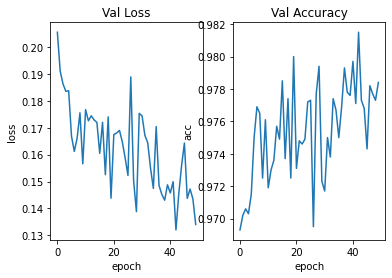

313/313 [==============================] - 0s 999us/step - loss: 0.1400 - accuracy: 0.9760
test loss: 0.1399623602628708
test accuracy: 0.9760000109672546


In [5]:
# 4
# L2 regularization, batch norm, adam optimizer

batchSize = 128
epoch = 50

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/50
196/196 [==============================] - 2s 7ms/step - loss: 0.3868 - accuracy: 0.9157 - val_loss: 0.2215 - val_accuracy: 0.9627
Epoch 2/50
196/196 [==============================] - 1s 6ms/step - loss: 0.1902 - accuracy: 0.9691 - val_loss: 0.1752 - val_accuracy: 0.9722
Epoch 3/50
196/196 [==============================] - 1s 6ms/step - loss: 0.1492 - accuracy: 0.9787 - val_loss: 0.1605 - val_accuracy: 0.9737
Epoch 4/50
196/196 [==============================] - 1s 6ms/step - loss: 0.1258 - accuracy: 0.9847 - val_loss: 0.1564 - val_accuracy: 0.9736
Epoch 5/50
196/196 [==============================] - 1s 6ms/step - loss: 0.1083 - accuracy: 0.9882 - val_loss: 0.1486 - val_accuracy: 0.9754
Epoch 6/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0962 - accuracy: 0.9903 - val_loss: 0.1409 - val_accuracy: 0.9778
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0890 - accuracy: 0.9915 - val_loss: 0.1365 - val_accuracy: 0.9767
Epoch 

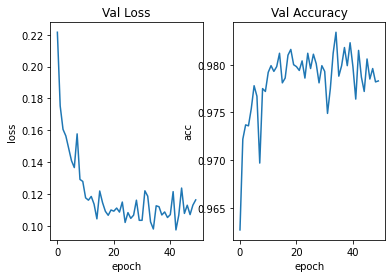

313/313 [==============================] - 0s 1ms/step - loss: 0.1170 - accuracy: 0.9765
test loss: 0.11704684048891068
test accuracy: 0.9764999747276306


In [6]:
# 5
# L2 regularization, Adam optimizer

batchSize = 256
epoch = 50

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time:', time.time() - start)

print('train loss:', model_fit.history['loss'][-1])
print('train accuracy:', model_fit.history['accuracy'][-1])

print('dev loss:', model_fit.history['val_loss'][-1])
print('dev accuracy:', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/50
196/196 [==============================] - 1s 6ms/step - loss: 0.3286 - accuracy: 0.9027 - val_loss: 0.1262 - val_accuracy: 0.9632
Epoch 2/50
196/196 [==============================] - 1s 6ms/step - loss: 0.1216 - accuracy: 0.9624 - val_loss: 0.0910 - val_accuracy: 0.9706
Epoch 3/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0854 - accuracy: 0.9732 - val_loss: 0.0730 - val_accuracy: 0.9776
Epoch 4/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0611 - accuracy: 0.9808 - val_loss: 0.0692 - val_accuracy: 0.9787
Epoch 5/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0489 - accuracy: 0.9845 - val_loss: 0.0695 - val_accuracy: 0.9792
Epoch 6/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0403 - accuracy: 0.9869 - val_loss: 0.0710 - val_accuracy: 0.9785
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0333 - accuracy: 0.9891 - val_loss: 0.0692 - val_accuracy: 0.9811
Epoch 

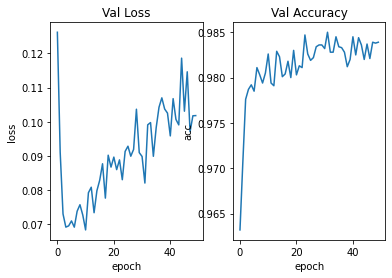

313/313 [==============================] - 0s 735us/step - loss: 0.0938 - accuracy: 0.9846
test loss: 0.09375939518213272
test accuracy: 0.9846000075340271


In [7]:
# 6
# Dropout regularization(0.2), Adam optimizer

batchSize = 256
epoch = 50

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/50
189/196 [===========================>..] - ETA: 0s - loss: 0.2959 - accuracy: 0.9147
Epoch 1: val_loss improved from inf to 0.13945, saving model to best_model.h5
196/196 [==============================] - 2s 7ms/step - loss: 0.2910 - accuracy: 0.9162 - val_loss: 0.1395 - val_accuracy: 0.9578
Epoch 2/50
192/196 [============================>.] - ETA: 0s - loss: 0.1018 - accuracy: 0.9695
Epoch 2: val_loss improved from 0.13945 to 0.09386, saving model to best_model.h5
196/196 [==============================] - 1s 6ms/step - loss: 0.1012 - accuracy: 0.9696 - val_loss: 0.0939 - val_accuracy: 0.9713
Epoch 3/50
191/196 [============================>.] - ETA: 0s - loss: 0.0611 - accuracy: 0.9816
Epoch 3: val_loss improved from 0.09386 to 0.07620, saving model to best_model.h5
196/196 [==============================] - 1s 6ms/step - loss: 0.0617 - accuracy: 0.9815 - val_loss: 0.0762 - val_accuracy: 0.9775
Epoch 4/50
195/196 [============================>.] - ETA: 0s - loss: 0.0419 

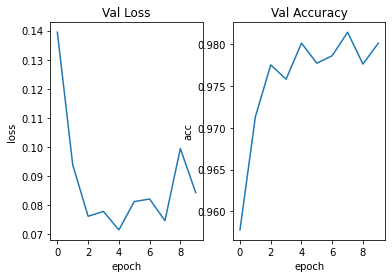

313/313 [==============================] - 0s 687us/step - loss: 0.0654 - accuracy: 0.9788
best test model loss:  0.0654139518737793
best test model accuracy:  0.9787999987602234


In [8]:
# 7
# Early stopping(patience=5), adam optimizer

batchSize = 256
epoch = 50

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
# early stopping
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev), callbacks=[early_stopping, model_checkpoint])

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

best_model = keras.models.load_model('best_model.h5')
best_test_loss, best_test_acc = best_model.evaluate(x_test, y_test)
print('best test model loss: ', best_test_loss)
print('best test model accuracy: ', best_test_acc)

Epoch 1/50
196/196 [==============================] - 2s 9ms/step - loss: 0.2948 - accuracy: 0.9415 - val_loss: 0.3983 - val_accuracy: 0.9303
Epoch 2/50
196/196 [==============================] - 2s 8ms/step - loss: 0.1544 - accuracy: 0.9806 - val_loss: 0.1961 - val_accuracy: 0.9685
Epoch 3/50
196/196 [==============================] - 2s 8ms/step - loss: 0.1256 - accuracy: 0.9882 - val_loss: 0.1789 - val_accuracy: 0.9725
Epoch 4/50
196/196 [==============================] - 2s 8ms/step - loss: 0.1134 - accuracy: 0.9896 - val_loss: 0.1762 - val_accuracy: 0.9723
Epoch 5/50
196/196 [==============================] - 2s 8ms/step - loss: 0.1019 - accuracy: 0.9918 - val_loss: 0.1698 - val_accuracy: 0.9745
Epoch 6/50
196/196 [==============================] - 2s 8ms/step - loss: 0.0994 - accuracy: 0.9915 - val_loss: 0.1645 - val_accuracy: 0.9748
Epoch 7/50
196/196 [==============================] - 2s 8ms/step - loss: 0.0968 - accuracy: 0.9909 - val_loss: 0.1669 - val_accuracy: 0.9741
Epoch 

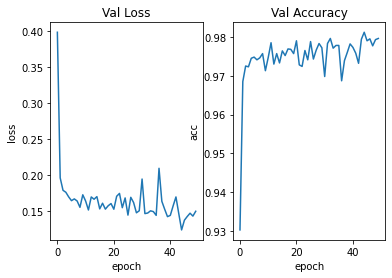

313/313 [==============================] - 0s 1ms/step - loss: 0.1318 - accuracy: 0.9804
test loss: 0.13182172179222107
test accuracy: 0.980400025844574


In [9]:
# 8
# L2 regularization, batch norm, adam optimizer

batchSize = 256
epoch = 50

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)